In [3]:
import os
import pandas as pd
import sys
from sklearn.metrics import mean_squared_error, mean_absolute_error
sys.path.append('../scripts')
combined_df = pd.read_pickle('../scripts/data/combined_df_engineered.pickle')
from LSTM_Encoder_Decoder import make_test
import matplotlib.pyplot as plt

# Models and parameters ordered by lowest MAE

In [14]:
results_df = pd.read_csv('../scripts/LSTM_test_results.csv')
results_df.sort_values(by='MAE')

,Model Name,First Neurons,Second Neurons,Dense Neurons,Learning Rate,Optimizer,Epochs,Batch Size,Sequence Length,MAE,RMSE
10,LSTM_encoder_decoder_sequence24-1551958606.h5,50,50,25,0.001,<tensorflow.python.keras.optimizers.Adam objec...,30,4,24,5.744686,7.516717
9,LSTM_encoder_decoder_sequence24-1551955984.h5,50,50,25,0.001,<tensorflow.python.keras.optimizers.Adam objec...,30,30,24,5.897530,8.297350
5,LSTM Encoder Decoder,500,500,500,0.0001,<tensorflow.python.keras.optimizers.SGD object...,50,24,168,8.159087,11.243433
11,LSTM_encoder_decoder_sequence48-1551966013.h5,50,50,25,0.001,<tensorflow.python.keras.optimizers.Adam objec...,20,1,48,8.931666,12.459846
4,LSTM_encoder_decoder_sequence168-1551873106.h5,200,200,100,0.001,<tensorflow.python.keras.optimizers.Adam objec...,25,12,168,9.526891,12.687515
8,LSTM_encoder_decoder_sequence168-1551954932.h5,50,50,25,0.001,<tensorflow.python.keras.optimizers.Adam objec...,30,30,168,9.672830,15.273429
6,LSTM Encoder Decoder,1000,1000,1000,0.0001,<tensorflow.python.keras.optimizers.Adam objec...,50,24,168,11.986663,15.876687
13,LSTM_encoder_decoder_sequence168-1552010356.h5,100,100,50,0.001,<tensorflow.python.keras.optimizers.Adam objec...,30,1,168,12.143906,19.710159
12,LSTM_encoder_decoder_sequence168-1551978241.h5,200,200,100,0.001,<tensorflow.python.keras.optimizers.Adam objec...,30,4,168,12.295507,16.399588
14,LSTM_encoder_decoder_sequence168-1552023571.h5,300,300,150,0.0001,<tensorflow.python.keras.optimizers.Adam objec...,50,6,168,12.496426,16.478808


# LSTM
## 1 Week Sequence
So far the best LSTM model that was tested was a network trained with parameters listed below. These models have a sequence length of 168 hours, which mean they predict a week at a time The LSTM below is a large network. Second neural net is much smaller than the one above, yet is slightly better because it reacts more to fluctuations in the spot price.

Used dataset: combined_df_engineered.pickle

Text(0.5, 1.0, 'MAE 21.32')

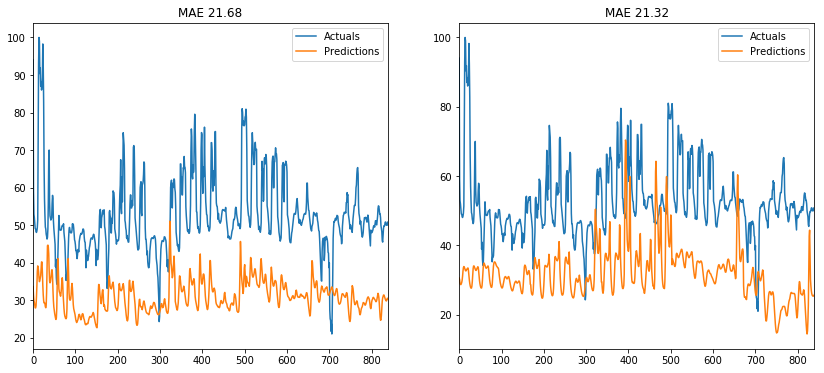

In [2]:
model_names = ['LSTM_encoder_decoder_sequence168-1551890848.h5','LSTM_encoder_decoder_sequence168-1551954932.h5']
test_result_df = make_test(combined_df[-(168*10):],model_names[0],24*7)
test_result_df2 = make_test(combined_df[-(168*10):].drop(columns=combined_df.columns[27:76]),model_names[1],24*7)
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14, 6))
test_result_df.plot(ax=axes[0])
axes[0].set_title(label=f"MAE {mean_absolute_error(test_result_df['Actuals'],test_result_df['Predictions']):.2f}")
test_result_df2.plot(ax=axes[1])
axes[1].set_title(label=f"MAE {mean_absolute_error(test_result_df2['Actuals'],test_result_df2['Predictions']):.2f}")

## Two more hidden layers
Didn't affect the model performance much.

Text(0.5, 1.0, 'MAE 21.48')

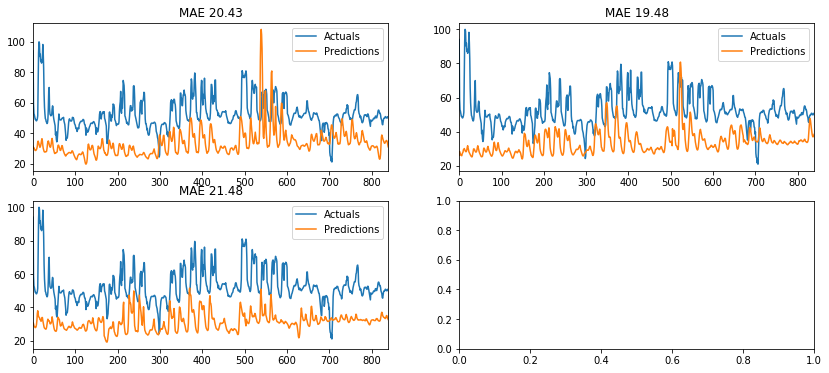

In [3]:
model_names=['LSTM_encoder_decoder_sequence168-1551978241.h5','LSTM_encoder_decoder_sequence168-1552010356.h5','LSTM_encoder_decoder_sequence168-1552023571.h5']
test_result_df1 = make_test(combined_df[-(168*10):].drop(columns=combined_df.columns[27:76]),model_names[0],24*7)
test_result_df2 = make_test(combined_df[-(168*10):].drop(columns=combined_df.columns[27:76]),model_names[1],24*7)
test_result_df3 = make_test(combined_df[-(168*10):].drop(columns=combined_df.columns[27:76]),model_names[2],24*7)
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(14, 6))
test_result_df1.plot(ax=axes[0,0])
axes[0,0].set_title(label=f"MAE {mean_absolute_error(test_result_df1['Actuals'],test_result_df1['Predictions']):.2f}")
test_result_df2.plot(ax=axes[0,1])
axes[0,1].set_title(label=f"MAE {mean_absolute_error(test_result_df2['Actuals'],test_result_df2['Predictions']):.2f}")
test_result_df3.plot(ax=axes[1,0])
axes[1,0].set_title(label=f"MAE {mean_absolute_error(test_result_df3['Actuals'],test_result_df3['Predictions']):.2f}")

## 24 hour sequence
Predicting the next 24 hours. Below is a small network just like the one above. Second is smaller batch size, still a small network

Text(0.5, 1.0, 'MAE 19.81')

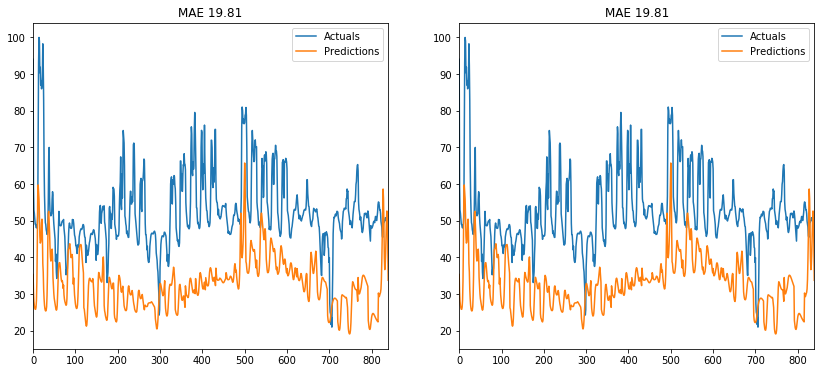

In [6]:
model_names = ['LSTM_encoder_decoder_sequence24-1551955984.h5','LSTM_encoder_decoder_sequence24-1551958606.h5']
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))
test_result_df1 = make_test(combined_df[-(24*10*7):].drop(columns=combined_df.columns[27:76]),model_names[0],24)
test_result_df1.plot(ax=axes[0])
axes[0].set_title(label=f"MAE {mean_absolute_error(test_result_df1['Actuals'],test_result_df1['Predictions']):.2f}")
test_result_df2 = make_test(combined_df[-(24*10*7):].drop(columns=combined_df.columns[27:76]),model_names[0],24)
test_result_df2.plot(ax=axes[1])
axes[1].set_title(label=f"MAE {mean_absolute_error(test_result_df2['Actuals'],test_result_df2['Predictions']):.2f}")

## 48 hour sequence
Predicting the next 48 hours.

Text(0.5, 1.0, 'MAE 22.341711793426015')

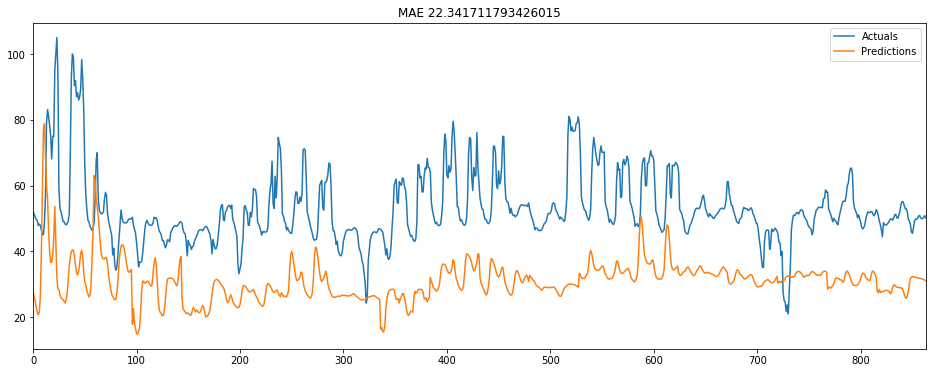

In [12]:
model_name = 'LSTM_encoder_decoder_sequence48-1551966013.h5'
test_result_df = make_test(combined_df[-(24*10*7):].drop(columns=combined_df.columns[27:76]),model_name,24*2)
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16, 6))
test_result_df.plot(ax=axes)
axes.set_title(label=f"MAE {mean_absolute_error(test_result_df['Actuals'],test_result_df['Predictions'])}")

## Same network, different sequence 
New feature engineered dataset: combined_df_engineered_T-24.pickle

# Random Forest
Results for random forest. The random forest predicts based on all current features, so it does not predict a sequence (a 24-hour or a week forecast) into the future 
Used dataset: combined_df_engineered.pickle (dropped one-hot encoded features)

Variable: Spot T-168           Importance: 0.17
Variable: Spot T-336           Importance: 0.13
Variable: Spot T-504           Importance: 0.11
Variable: Spot MA              Importance: 0.05
Variable: Spot STD             Importance: 0.03
Variable: Spot Rolling Min     Importance: 0.03
Variable: Spot Rolling Max     Importance: 0.03
Variable: Helsinki Temperature Importance: 0.02
Variable: Jyvaskyla Temperature Importance: 0.02
Variable: Rovaniemi Temperature Importance: 0.02
Variable: Nuclear Power Production FI Importance: 0.02
Variable: Wind Power Production FI Importance: 0.02
Variable: FI-EE                Importance: 0.02
Variable: FI-RU                Importance: 0.02
Variable: Hydro Reservoir NO   Importance: 0.02
Variable: Hydro Reservoir SE   Importance: 0.02
Variable: Hydro Reservoir FI   Importance: 0.02
Variable: Coal                 Importance: 0.02
Variable: Oil                  Importance: 0.02
Variable: Finland Temperature  Importance: 0.02
Variable: ^OMXH25 Close    

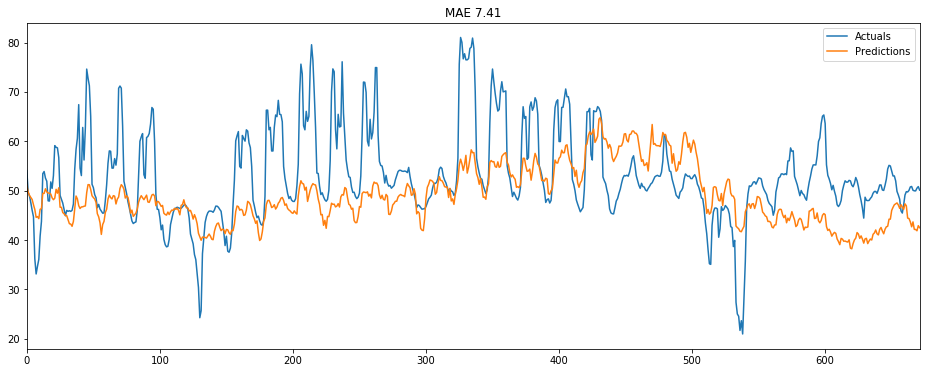

In [13]:
import random_forest
from sklearn.externals import joblib
forest = joblib.load('../scripts/models/random_forest9.sav')
feature_names = combined_df.drop('Spot',axis=1).columns
predictions, labels = random_forest.predict_forest(forest,combined_df[-168*4:].drop(columns=combined_df.columns[27:43]))
test_result_df = pd.DataFrame(columns=['Actuals','Predictions'])
#print(mean_absolute_error(test_result_df['Actuals'],test_result_df['Predictions']))
test_result_df['Actuals'] = labels
test_result_df['Predictions'] = predictions
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16, 6))
test_result_df.plot(ax=axes)
axes.set_title(label=f"MAE {mean_absolute_error(test_result_df['Actuals'],test_result_df['Predictions']):.2f}")
random_forest.list_importances(forest,feature_names)

### New dataset

Index(['Spot', 'Helsinki Temperature', 'Jyvaskyla Temperature',
       'Rovaniemi Temperature', 'Consumption', 'Nuclear Power Production FI',
       'Wind Power Production FI', 'FI-EE', 'FI-NO', 'FI-RU',
       ...
       'Spot T-696', 'Spot MA T-696', 'Spot STD T-696',
       'Spot Rolling Min T-696', 'Spot Rolling Max T-696', 'Spot T-720',
       'Spot MA T-720', 'Spot STD T-720', 'Spot Rolling Min T-720',
       'Spot Rolling Max T-720'],
      dtype='object', length=204)
Variable: Spot T-24            Importance: 0.05
Variable: Spot T-168           Importance: 0.05
Variable: Spot T-336           Importance: 0.05
Variable:  Tuotantotasesähkön myyntihinta Importance: 0.04
Variable: Spot Rolling Max T-24 Importance: 0.04
Variable: yhat_upper           Importance: 0.03
Variable: yhat                 Importance: 0.03
Variable: Spot MA T-24         Importance: 0.03
Variable: Spot T-504           Importance: 0.03
Variable: Tuotantotasesähkön ostohinta Importance: 0.02
Variable: yhat_lower

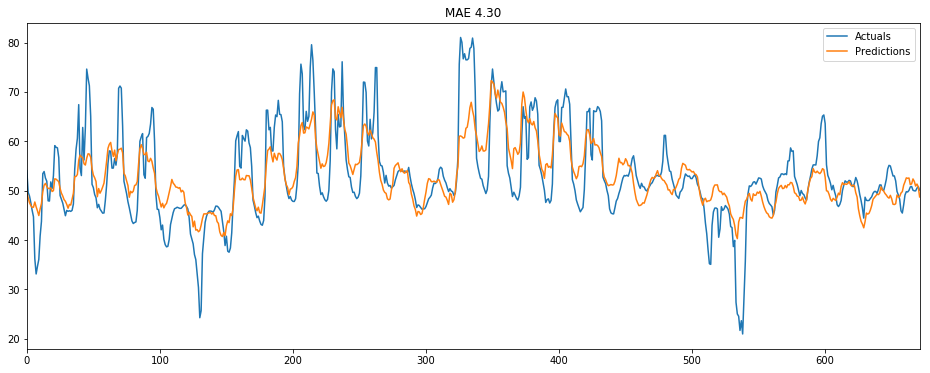

In [8]:
import random_forest
from sklearn.externals import joblib
combined_df = pd.read_pickle('combined_df_engineered_T-24.pickle')
print(combined_df.columns)
forest = joblib.load('../scripts/models/random_forest10.sav')
feature_names = combined_df.drop('Spot',axis=1).columns
predictions, labels = random_forest.predict_forest(forest,combined_df[-168*4:])
test_result_df = pd.DataFrame(columns=['Actuals','Predictions'])
#print(mean_absolute_error(test_result_df['Actuals'],test_result_df['Predictions']))
test_result_df['Actuals'] = labels
test_result_df['Predictions'] = predictions
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16, 6))
test_result_df.plot(ax=axes)
axes.set_title(label=f"MAE {mean_absolute_error(test_result_df['Actuals'],test_result_df['Predictions']):.2f}")
random_forest.list_importances(forest,feature_names)

## Holt-Winters

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_df = combined_df['Spot']
train, test = hw_df['2013':'2017'], hw_df['2018']
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=24).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])

#plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')